<a href="https://colab.research.google.com/github/harry7337/EnvisionAssignments/blob/main/SampleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential

In [ ]:
mnist=keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_val,y_val)=mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_val.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_val=x_val.reshape(10000,28,28,1)

In [ ]:
def create_model(x_train):
  model = Sequential([
                      Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]),

                      MaxPool2D((2,2)),
                                
                      Conv2D(16, (3,3), activation='relu'),

                      MaxPool2D((2,2)),

                      Flatten(),

                      Dense(128, activation='relu'),

                      Dense(10, activation='softmax')
  ])
  return model
                      
                    

In [ ]:
model = create_model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(x_train,y_train, epochs=10, validation_data=(x_val,y_val))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0544 - accuracy: 0.7379 - val_loss: 0.4706 - val_accuracy: 0.8208
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4187 - accuracy: 0.8422 - val_loss: 0.3987 - val_accuracy: 0.8536
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3486 - accuracy: 0.8710 - val_loss: 0.3649 - val_accuracy: 0.8624
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3057 - accuracy: 0.8833 - val_loss: 0.3729 - val_accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2794 - accuracy: 0.8952 - val_loss: 0.3551 - val_accuracy: 0.8739
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9012 - val_loss: 0.3533 - val_accuracy: 0.8744
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2421 - accuracy: 0.9066 - val_loss: 0.3324 - val_accuracy:

4


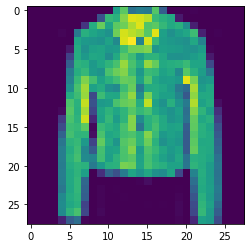

In [ ]:
img = x_val[10]
plt.imshow(img.reshape(28,28))
print(y_val[10])

In [ ]:
pred = model.predict(img.reshape(1,28,28,1))[0]
print(pred)

[4.9847076e-06 5.9666370e-08 1.3679276e-03 9.0961808e-11 9.3807489e-01
 1.2238364e-13 6.0552139e-02 4.1395354e-14 3.0688871e-10 1.1617836e-16]


In [ ]:
pred.shape

(10,)

In [ ]:
#mx = max(list(pred))
max=0
for i in range(10):
  if pred[i]>max:
    max=pred[i]
for i in range(10):
  if pred[i]==max:
    print(i)


4


<Figure size 432x288 with 0 Axes>

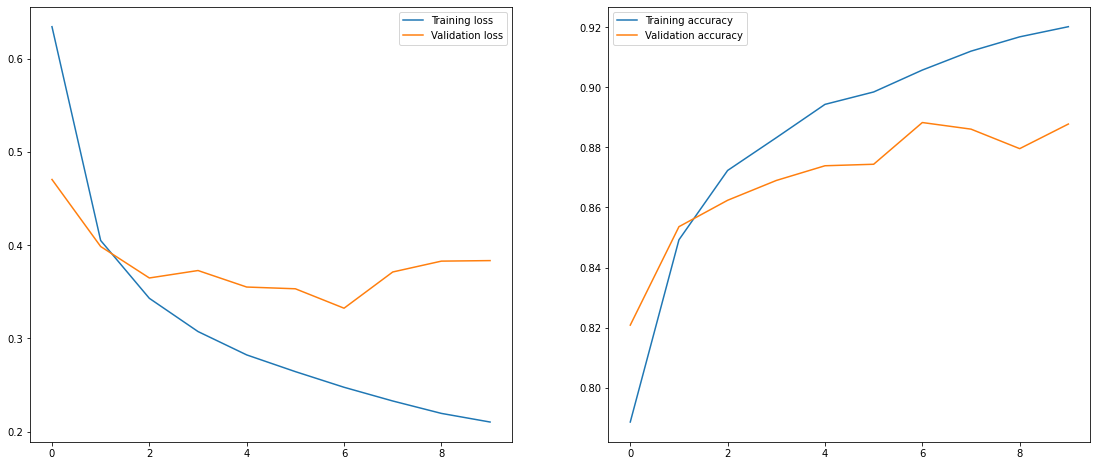

In [ ]:
plt.figure()
fig,(a1,a2)=plt.subplots(1,2,figsize=(19,8))

a1.plot(history.history['loss'])
a1.plot(history.history['val_loss'])
a1.legend(['Training loss', 'Validation loss'])

a2.plot(history.history['accuracy'])
a2.plot(history.history['val_accuracy'])
a2.legend(['Training accuracy', 'Validation accuracy'])

